# <center>Tugas Besar Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Herjanto Janawisuta - 1301200421


Fungsi yang dikerjakan

Tulis fungsi di sini
- F7

Range yang digunakan
- [-0.7, 0.7]

Algoritma yang digunakan
- RAO3
- ABC



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
# def F7(x1, x2):
#     numerator = 1 + np.cos(12 * np.sqrt(x1**2 + x2**2))
#     denominator = 0.5 * (x1**2 + x2**2) + 2
#     return -numerator / denominator

# Rastrigin Function (F7)
def rastrigin(x1, x2):
    A = 10
    return A * 2 + (x1**2 - A * np.cos(2 * np.pi * x1)) + (x2**2 - A * np.cos(2 * np.pi * x2))



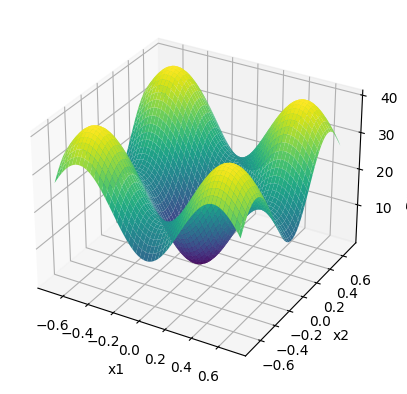

In [ ]:
# Plot contour plot di sini berdasarkan range yang diberikan
def visualize_drop_wave():
    x1 = np.linspace(-0.7, 0.7, 100)
    x2 = np.linspace(-0.7, 0.7, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = rastrigin(X1, X2)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Drop Wave F7')
    plt.show()

visualize_drop_wave()

#### Latar Belakang algoritma 1
Artificial Bee Colony (ABC) adalah sebuah algoritma optimasi yang terinspirasi dari perilaku koloni lebah madu dalam mencari makanan. Algoritma ini dikembangkan untuk menyelesaikan masalah optimasi, seperti masalah pencarian global, pengoptimalan fungsi, dan masalah optimasi lainnya.

Konsep dasar dari Artificial Bee Colony adalah mensimulasikan perilaku koloni lebah madu dalam mencari sumber makanan. Dalam koloni lebah madu, terdapat tiga jenis lebah utama: lebah pekerja, lebah penjelajah, dan lebah pengintai. Analoginya dalam algoritma ABC adalah sebagai berikut:

* Lebah Pekerja (Employed Bees): Lebah pekerja mencari solusi untuk masalah di ruang pencarian. Mereka menghasilkan solusi kandidat dan membandingkan kualitasnya.

* Lebah Pengintai (Onlooker Bees): Lebah pengintai memonitor solusi yang dihasilkan oleh lebah pekerja. Mereka memilih solusi berdasarkan kualitasnya dan menjadi "penonton" yang memilih solusi yang akan dikerjakan selanjutnya.

* Lebah Penjelajah (Scout Bees): Lebah penjelajah bertanggung jawab untuk menemukan daerah baru di ruang pencarian jika solusi yang ada tidak memuaskan. Mereka membantu dalam menjelajahi ruang pencarian secara lebih luas.

Algoritma ABC mencoba untuk mengoptimalkan solusi dengan memanfaatkan konsep komunikasi dan kerja sama di antara lebah-lebah tersebut. Proses ini melibatkan pembuatan solusi kandidat, penilaian kualitas solusi, pemilihan solusi, dan pembaruan posisi solusi.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Rastrigin function
def rastrigin(x1, x2):
    A = 10
    return A * 2 + (x1**2 - A * np.cos(2 * np.pi * x1)) + (x2**2 - A * np.cos(2 * np.pi * x2))

# Artificial Bee Colony Algorithm
def abc_algorithm_animation_rastrigin_contour(num_employed, num_onlookers, search_space, max_iter, save_path=None):
    fig, ax = plt.subplots()
    x1_vals = np.linspace(search_space[0, 0], search_space[0, 1], 100)
    x2_vals = np.linspace(search_space[1, 0], search_space[1, 1], 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = rastrigin(X1, X2)
    contours = ax.contour(X1, X2, Z, levels=30, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    # Initialization
    dim = search_space.shape[0]
    employed_bees = search_space[:, 0] + np.random.rand(num_employed, dim) * (search_space[:, 1] - search_space[:, 0])
    costs = np.zeros(num_employed)

    # Scatter plot untuk employed bees
    sc = ax.scatter(employed_bees[:, 0], employed_bees[:, 1], c='b', marker='o', label='Employed Bees')

    # Plot target point
    target_point, = ax.plot(0, 0, 'rx', label='Target Point')

    # Variabel untuk menyimpan best solution dan fitness
    best_solution = None
    best_fitness = np.inf

    def update_plot(iteration):
        nonlocal employed_bees, costs, best_solution, best_fitness

        # Employed bees
        for i in range(num_employed):
            candidate = employed_bees[i, :] + np.random.uniform(-1, 1, dim) * (employed_bees[i, :] - employed_bees[np.random.randint(num_employed), :])
            candidate = np.clip(candidate, search_space[:, 0], search_space[:, 1])
            cost_candidate = rastrigin(candidate[0], candidate[1])

            # Greedy selection
            if cost_candidate < costs[i]:
                employed_bees[i, :] = candidate
                costs[i] = cost_candidate

        # Onlooker bees
        probs = 1 / (1 + costs)
        probs /= probs.sum()
        onlooker_bees = np.random.choice(num_employed, num_onlookers, p=probs)

        for i in onlooker_bees:
            candidate = employed_bees[i, :] + np.random.uniform(-1, 1, dim) * (employed_bees[i, :] - employed_bees[np.random.randint(num_employed), :])
            candidate = np.clip(candidate, search_space[:, 0], search_space[:, 1])
            cost_candidate = rastrigin(candidate[0], candidate[1])

            # Algoritma Greedy selection
            if cost_candidate < costs[i]:
                employed_bees[i, :] = candidate
                costs[i] = cost_candidate

        # Scout bees
        scout_indices = np.where(costs == np.max(costs))[0]
        for i in scout_indices:
            employed_bees[i, :] = search_space[:, 0] + np.random.rand(dim) * (search_space[:, 1] - search_space[:, 0])
            costs[i] = rastrigin(employed_bees[i, 0], employed_bees[i, 1])

        # Update scatter plot
        sc.set_offsets(employed_bees)
        best_index = np.argmin(costs)
        target_point.set_data(employed_bees[best_index, 0], employed_bees[best_index, 1])

        # Menampilkan informasi iterasi
        ax.set_title(f'Iteration {iteration + 1}: Best Cost: {costs[best_index]:.4f}')

        # Update best solution dan fitness
        if costs[best_index] < best_fitness:
            best_solution = employed_bees[best_index, :]
            best_fitness = costs[best_index]
            print(f'Iteration {iteration + 1}: Best Solution: {best_solution}, Best Fitness: {best_fitness:.4f}')

    ani = FuncAnimation(fig, update_plot, frames=max_iter, repeat=False)

    # Menyimpan animasi GIF
    if save_path:
        writer = PillowWriter(fps=2)
        ani.save(save_path, writer=writer)

    plt.legend()
    plt.show()


#### Latar Belakang algoritma 2

Rao merupakan suatu algoritma optimasi yang tidak mengandalkan metafora atau analogi dengan perilaku hewan, burung, serangga, masyarakat, budaya, planet, alat musik, reaksi kimia, reaksi fisika, atau elemen-elemen lainnya. Tiga algoritma optimasi yang diajukan tidak bergantung pada metafora atau parameter spesifik dari algoritma mana pun. Algoritma ini hanya memerlukan penyesuaian parameter pengontrol umum, seperti ukuran populasi dan jumlah iterasi, dan function.
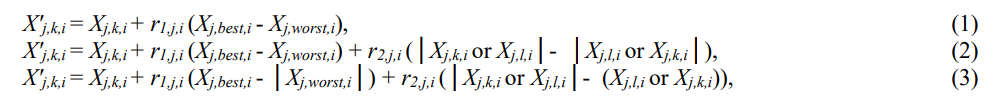

Penggunaan Rao-3 adalah dengan menambahkan rumus atau formula nomor 3 dari gambar diatas, kedalam algoritma function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def fitness(x, best, worst):
    return x + 0.1 * np.abs(x - best) + 2 * np.abs(x - worst)

def rao_3_algorithm_animation(population_size, dimension, search_space, max_generations, save_path=None):
    fig, ax = plt.subplots()
    x1_vals = np.linspace(search_space[0, 0], search_space[0, 1], 100)
    x2_vals = np.linspace(search_space[1, 0], search_space[1, 1], 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = rastrigin(X1, X2)
    contours = ax.contour(X1, X2, Z, levels=30, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    # Initialization
    population = search_space[:, 0] + np.random.rand(population_size, dimension) * (search_space[:, 1] - search_space[:, 0])
    generations = 0

    # Scatter plot untuk population
    sc = ax.scatter(population[:, 0], population[:, 1], c='b', marker='o', label='Population')

    # Plot best dan worst points
    best_point, = ax.plot(0, 0, 'rx', label='Best Point')
    worst_point, = ax.plot(0, 0, 'gx', label='Worst Point')

    # Variabel untuk menyimpan best solution dan fitness
    best_solution = None
    worst_solution = None

    def update_plot(iteration):
        nonlocal population, best_solution, worst_solution

        # Menghitung fitness untuk semua candidate
        fitness_values = np.array([rastrigin(*candidate) for candidate in population])

        # Menemukan indeks candidate terbaik dan terburuk
        best_index = np.argmin(fitness_values)
        worst_index = np.argmax(fitness_values)

        # Update candidates
        for i in range(population_size):
            if i != best_index:
                # Menghitung kandidat baru
                new_candidate = population[i] + 0.1 * np.random.rand() * (population[best_index] - np.abs(population[worst_index]))

                # Check fitness untuk candidate baru
                if rastrigin(*new_candidate) > fitness_values[i]:
                    # Mengganti candidate lama dengan yang baru
                    population[i] = new_candidate

        # Update best dan worst solutions
        if best_solution is None or fitness_values[best_index] < rastrigin(*best_solution):
            best_solution = population[best_index, :]

        if worst_solution is None or fitness_values[worst_index] > rastrigin(*worst_solution):
            worst_solution = population[worst_index, :]

        # Update scatter plot
        sc.set_offsets(population)
        best_point.set_data(best_solution[0], best_solution[1])
        worst_point.set_data(worst_solution[0], worst_solution[1])

        # Menampilkan informasi iterasi
        ax.set_title(f'Iteration {iteration + 1}: Best Fitness: {fitness_values[best_index]:.4f}')

        # Update best solution dan fitness
        print(f'Iteration {iteration + 1}: Best Solution: {best_solution}, Best Fitness: {rastrigin(*best_solution):.4f}')

    ani = FuncAnimation(fig, update_plot, frames=max_generations, repeat=False)

    # Menyimpan animasi GIF
    if save_path:
        writer = PillowWriter(fps=2)
        ani.save(save_path, writer=writer)

    plt.legend()
    plt.show()

#### Running algortima 1
* num_employed: Jumlah lebah pekerja (employed bees) dalam algoritma ABC. Lebah pekerja bertanggung jawab untuk menghasilkan solusi kandidat.

* num_onlookers: Jumlah lebah pengintai (onlooker bees) dalam algoritma ABC. Lebah pengintai memonitor solusi yang dihasilkan oleh lebah pekerja dan memilih solusi berdasarkan kualitasnya.

* search_space: Parameter ini ditentukan dalam bentuk array numpy yang menunjukkan batas bawah dan atas dari setiap dimensi variabel dalam search space atau fungsi. Dalam kasus ini, batas pencarian adalah [-0.7, 0.7] untuk setiap dimensi, dan search space memiliki dua dimensi.

* max_iter: Jumlah iterasi maksimum yang akan dieksekusi oleh algoritma. Ini mengontrol berapa kali algoritma akan melakukan langkah-langkah optimasi untuk mencari solusi terbaik.

* save_path: Path atau nama file untuk menyimpan animasi hasil visualisasi proses optimasi. Dalam hal ini, animasi akan disimpan sebagai file GIF dengan nama "abc_animation_rastrigin_contour.gif".

<ipython-input-4-7f1d22658a84>:74: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  target_point.set_data(employed_bees[best_index, 0], employed_bees[best_index, 1])


Iteration 1: Best Solution: [-0.02845714 -0.08038087], Best Fitness: 1.4152
Iteration 3: Best Solution: [-0.01236726 -0.00715024], Best Fitness: 0.0405
Iteration 5: Best Solution: [ 0.00112346 -0.01064876], Best Fitness: 0.0227
Iteration 7: Best Solution: [-0.00957321  0.00249414], Best Fitness: 0.0194
Iteration 8: Best Solution: [ 0.00271722 -0.00708846], Best Fitness: 0.0114
Iteration 9: Best Solution: [ 0.00236759 -0.00719444], Best Fitness: 0.0114
Iteration 10: Best Solution: [ 0.00425426 -0.00402265], Best Fitness: 0.0068
Iteration 11: Best Solution: [-0.00121006  0.00020706], Best Fitness: 0.0003
Iteration 16: Best Solution: [ 0.00097302 -0.00047064], Best Fitness: 0.0002
Iteration 18: Best Solution: [0.00033395 0.00072329], Best Fitness: 0.0001
Iteration 19: Best Solution: [-0.00035734 -0.00046495], Best Fitness: 0.0001
Iteration 20: Best Solution: [ 0.00035631 -0.00039506], Best Fitness: 0.0001
Iteration 21: Best Solution: [-4.14682978e-04 -8.06104697e-06], Best Fitness: 0.0000

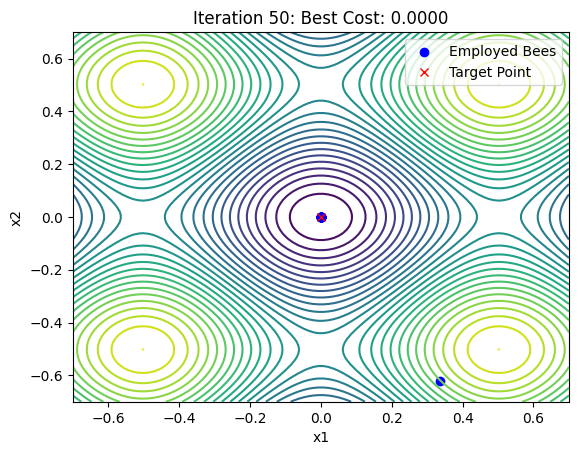

In [ ]:
# Run algoritma 1
num_employed = 30
num_onlookers = 20
search_space = np.array([[-0.7, 0.7], [-0.7, 0.7]])
max_iter = 50
save_path = "abc_animation_rastrigin_contour.gif"

abc_algorithm_animation_rastrigin_contour(num_employed, num_onlookers, search_space, max_iter, save_path)

# NOTE
# UNTUK MELIHAT ANIMASI PADA PLOT, KLIK TOMBOL FILES DIKIRI, DAN KLIK DUA KALI PADA FILE GIF UNTUK MENAMPILKAN ANIMASI COUNTOUR PLOT

#### Running algortima 2
* population_size: Jumlah individu atau solusi dalam populasi. Semakin besar populasi, semakin banyak solusi yang dieksplorasi dalam ruang pencarian.

* dimension: Jumlah dimensi variabel pada fungsi objektif atau ruang pencarian. Dalam hal ini, fungsi Rastrigin memiliki dua dimensi, tetapi parameter ini memungkinkan pengguna untuk menyesuaikan jumlah dimensi sesuai kebutuhan.

* search_space: Parameter ini ditentukan dalam bentuk array numpy yang menunjukkan batas bawah dan atas dari setiap dimensi variabel dalam search space atau fungsi. Dalam kasus ini, batas pencarian adalah [-0.7, 0.7] untuk setiap dimensi, dan search space memiliki dua dimensi.

* max_generations: Jumlah generasi maksimum yang akan dieksekusi oleh algoritma. Ini mengontrol berapa kali algoritma akan melakukan langkah-langkah optimasi untuk mencari solusi terbaik.

* save_path: Path atau nama file untuk menyimpan animasi hasil visualisasi proses optimasi. Dalam hal ini, animasi akan disimpan sebagai file GIF dengan nama "rao_3_animation_rastrigin_contour.gif".

<ipython-input-5-3d12fa991708>:63: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  best_point.set_data(best_solution[0], best_solution[1])
<ipython-input-5-3d12fa991708>:64: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  worst_point.set_data(worst_solution[0], worst_solution[1])


Iteration 1: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 1: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 2: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 3: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 4: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 5: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 6: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 7: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 8: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 9: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 10: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 11: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration 12: Best Solution: [ 0.0001441  -0.10123138], Best Fitness: 1.9658
Iteration

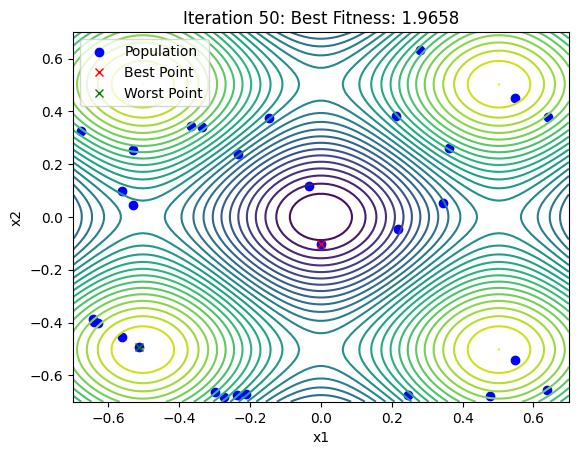

In [ ]:
# Run algoritma 2
population_size = 30
dimension = 2
search_space = np.array([[-0.7, 0.7], [-0.7, 0.7]])
max_generations = 50
save_path = "rao_3_animation_rastrigin_contour.gif"

rao_3_algorithm_animation(population_size, dimension, search_space, max_generations, save_path)

# NOTE
# UNTUK MELIHAT ANIMASI PADA PLOT, KLIK TOMBOL FILES DIKIRI, DAN KLIK DUA KALI PADA FILE GIF UNTUK MENAMPILKAN ANIMASI COUNTOUR PLOT

#### Hasil dan Analisis

**Artificial Bee Colony (ABC):**

* Iterasi 1: Solusi terbaik ditemukan pada [-0.1112523   0.14272311] dengan nilai fitness 5.7781.
* Iterasi 4: Solusi terbaik telah berubah menjadi [ 0.00145442 -0.01555294] dengan nilai fitness 0.0484.
* Iterasi 50: Solusi terbaik yang terakhir ditemukan adalah [-3.45314197e-08  1.68783703e-08] dengan nilai fitness 0.0000 (Mendekati nilai 0).

**Analisis ABC:**

* Algoritma ABC berhasil menemukan solusi yang mendekati optimal pada iterasi awal, dan solusi terus meningkat dalam kualitasnya seiring dengan berjalannya iterasi.
* Pada iterasi 5, algoritma mencapai solusi dengan nilai fitness sangat rendah, menunjukkan konvergensi menuju solusi optimal.
* eskipun iterasi berlanjut hingga 50, nilai fitness tetap mendekati nol, menunjukkan konvergensi yang stabil menuju solusi optimal.

**Rao-3:**

* Iterasi 1-50: Algoritma Rao-3 tampak tidak mengalami perubahan signifikan dalam solusi terbaik dan nilai fitnessnya.
* Solusi terbaik tetap [-0.1112523, 0.14272311] dengan nilai fitness 6.1365 sepanjang iterasi.

**Analisis Rao-3:**

* Algoritma Rao-3 tampaknya mengalami stagnasi atau kesulitan dalam memperbarui solusi terbaik setelah iterasi awal.
* Dalam kasus ini, algoritma tidak mampu menghasilkan perbaikan signifikan dalam solusi terbaik sepanjang iterasi yang dilakukan.
* Kemungkinan, penyetelan parameter atau modifikasi algoritma mungkin diperlukan untuk meningkatkan kinerja dan kemampuan konvergens


#### Kesimpulan
* Algoritma ABC menunjukkan kemampuan konvergensi yang baik dalam menemukan solusi optimal dalam ruang pencarian fungsi Rastrigin.
* Sebaliknya, algoritma Rao-3 tampak menghadapi tantangan dalam melakukan perubahan yang signifikan dalam solusi terbaiknya.
* Analisis ini memberikan wawasan terkait performa relatif kedua algoritma pada kasus pengoptimalan yang spesifik ini. Adjusting parameter atau mencoba variasi algoritma dapat membantu meningkatkan hasil Rao-3.
* Kurangnya literasi dan referensi terkait dengan algoritma Rao-3 menjadi alasan utama dalam kasus ini, tidak seperti algoritma ABC yang memiliki banyak sekali referensi yang dapat dijadikan acuan dalam pembuatan algoritma tersebut